In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib.font_manager import FontProperties
import datetime as dt
#%matplotlib inline
#plt.rcParams['font.sans-serif'] = ['SimHei']
#chinese_font = FontProperties(fname='/usr/share/fonts/MyFonts/simhei.ttf')
#plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('data.csv', index_col='Date')
data.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in data.index]
data.head()

,沪深300,中国平安
2015-06-23,0.03214,0.0496
2015-06-24,0.01965,0.0052
2015-06-25,-0.03557,-0.0287
2015-06-26,-0.07868,-0.0605
2015-06-29,-0.03336,-0.0119


Text(0,0.5,'涨跌幅')

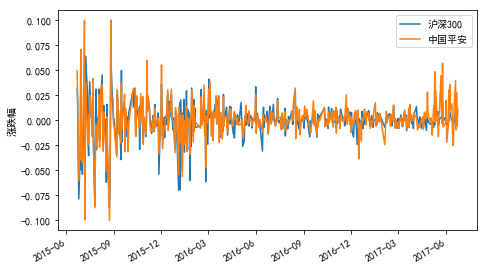

In [3]:
ax = data.plot(figsize=(7.5,4.5))
ax.set_ylabel(u'涨跌幅')

In [16]:
import statsmodels.api as sm

In [17]:
x = data['沪深300'].values
#x

In [18]:
x = sm.add_constant(x)
y = data['中国平安'].values
#x

In [19]:
#对两者进行现行回归
model = sm.OLS(y,x)
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     663.7
Date:                Tue, 10 Jul 2018   Prob (F-statistic):           5.53e-93
Time:                        17:08:15   Log-Likelihood:                 1455.4
No. Observations:                 489   AIC:                            -2907.
Df Residuals:                     487   BIC:                            -2898.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.700      0.090      -0.000       0.002
x1             0.8095      0.031     25.763      0.000       0.748       0.871
==============================================================================
Omnibus:                      284.123   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5897.208
Skew:                           2.081   Prob(JB):                         0.00
Kurtosis:                      19.496   Cond. No.                         56.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results.params

array([0.00095063, 0.80946537])

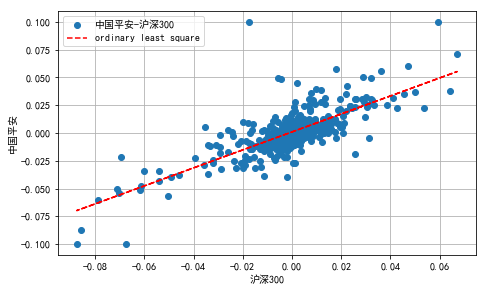

In [10]:
plt.figure(figsize=(7.5, 4.5))
x = data['沪深300'].values
plt.plot(x, y, 'o', label='中国平安-沪深300')
plt.plot(x, results.fittedvalues, 'r--', label='ordinary least square')
plt.legend()
plt.xlabel('沪深300')
plt.ylabel('中国平安')
plt.grid(True)